# Advanced Statistics and Hypothesis Testing

## What is a Hypothesis?

It's a statistical method used to determine whether there's enough evidence in a sample of data to infer whether a certain condition holds true or not.

Hypothesis Testing Process:
- Clear research question
- Well-defined Hypothesis
- Appropriate data collection
- Choose the right statistical test
- Repetition for reproducibility


## Hypothesis Components
We have 2 components:
- Independent Variable
- Dependent Variable

**Example** If you don't clean the fish tank once every 3 days, the fish will probably not survive for more than 3 months:
- Independent variable: "you don't clean the fish tank once every 3 days"
- Dependent variable: "the fish will probably not survive for more than 3 months"

A good hypothesis must:
1. Explicitly state the **independent** and **dependent** variables
2. Must be testable/reproducible 
3. Be based on authentic research work and sample collection. This means the sample must be a good representative of the population.

## Hypothesis Testing
- A statistical method used to determine whether there is enough evidence in a sample of data to infer that a certain condition holds true for the entire population.
- Key concepts in Hypothesis Testing:
    - **Null Hypothesis** ($H_0$):
        - It's a statement of no effect or no difference
        - It's the default assumption that there's no change, difference, or relationship
        - example: 
            - there's no correlation between age and income
            - there's no difference in the average score between two teaching methods
    - **Alternative Hypothesis** ($H_a$ or $H_1$):
        - It's a statement that you want to prove where there's a statistically significant evidence.
        - It's what you want to prove to be correct or what you want to test for.
        - example: 
            - there's a correlation between age and income
            - there's a difference in the average score between two teaching methods
    - **Significance Level** ($\alpha$) (critical value)
        - Is the probability for rejecting the null hypothesis
        - In the industry, we usually use 0.05 or 5% (sometimes 0.01 or 1%)
    - **p-value** ($p$)
        - Is the probability of statement form the sample being true
-  Once we have the components above, we can perform the Hypothesis Evaluation using the following steps:
    1. Define the statement of the hypothesis
    2. Format the statement into $H_0$ and $H_a$ ($H_0$ is always against our statement)
    3. Choose the appropriate statistical test:
        - t-test (deals with averages $\mu$)
        - z-test (deals with averages $\mu$)
        - chi-square test
        - ANOVA (deals with averages $\mu$)
        - Other tests: MANOVA, Mann-Whitney U, and Kruskal-Wallis tests
    4. Set a $\alpha$ value (0.05 or 0.01). Note: it can be set by you, stakeholders, managers, or you org.
    5. Calculate $p-value$ using the statistical function in python and the given dataset
    6. based on $p-value$ and $\alpha$:
        - If the p-value is **greater** than alpha, we **do not reject the null hypothesis**. in other words, **we accept the null hypothesis**
        - If the p-value is **less** than alpha, we **do reject the null hypothesis**. in other words, **we accept the alternative hypothesis**


![h](https://userpage.fu-berlin.de/soga/soga-py/200/2070_hypothesis_tests/img/Generalized_figure_of_two_sided_test.png)


**Conclusion** The goal of hypothesis testing is to determine if there is enough statistical evidence to reject the null hypothesis in favor of the alternative hypothesis. If there isn't sufficient evidence, we fail to reject Ho​, meaning we do not have enough proof to claim Ha​ is true.

Common Pitfalls:

- Type I Error (False Positive): Rejecting the null hypothesis when it’s true.
- Type II Error (False Negative): Failing to reject the null hypothesis when it’s false.
- P-hacking: Manipulating data or tests to achieve a significant p-value.

## t-test

### When to use?
- For comparing 2 segments of the sample using 1 numeric measure
- When the sample size is very small (<=30>) **OR** the population standard deviation is unknown
- Applications: t-test can help with comparing 2 independent variables, 1 variable against the population mean, and 2 dependent variables (before and after effect)

## t-test
### When to use?
- For comparing 2 segments of the sample using 1 numeric measure
- When the sample size is very small (<=30>) **OR** the population standard deviation is unknown

### Types of t-tests
- **Independent Sample t-test**: evaluating if 2 _independent, unrelated_ groups are the same or not. Example: a group of people that eat bananas have change in levels of potassium vs a different group of people that don't eat bananas.
    - For Group 1 vs Group 2 potassium levels:
        - $H_0$: $\mu_1 = \mu_2$ (there's no difference)
        - $H_a$: $\mu_1 \neq \mu_2$ (the bananas are causing an impact)
- **Paired-Sample t-test**: (aka relationship test) evaluating if 2 samples taken from _same group_ are the same or not. It's mainly used for _before_ vs _after_ comparison. Example: students that took an extra math session had a different outcome on their second exam compared to the first one. We're comparing the same group of students before vs after taking the extra session.
    - For same group before (bef) and after (aft):
        - $H_0$: $\mu_{bef} = \mu_{aft}$ (there's no difference)
        - $H_a$: $\mu_{bef} \neq \mu_{aft}$ (the extra session is making an impact)

- **One-Sample t-test**: evaluating if the average of a single group is different from the known population average (X). The population mean is usually a supposed mean from an article, publishing, old research, etc... So, you're trying to evaluate against the fact that it's the population mean. Example: An article states that the average IQ of US adults is 108. We collect a sample from US population (_all states_ + _adults_). Then, we evaluate against known population average (against the article's claims).
    - For population ($X$) vs sample ($\mu_{s}$):
        - $H_0$: $\mu_{s} = X$ (there's no difference - the article's claim is true)
        - $H_a$: $\mu_{s} \neq X$ (there's a difference - the article's claim is untrue)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts

#### Independent Sample t-test

**Scenario: A/B Testing for New Website Functionality**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "Buy Now" button on the website is being tested against a new design to see if it leads to a higher conversion rate (or change in conversion rate).

Data Collection and Evaluation Methodology - for placebo effect and having a control group
1. Randomly select website users broken into group A and group B (independent groups)
2. Give group A the old website and group B the new website (new button)
3. Measure usage score
4. Perform an independent statistical test whether there's a difference in the engagement or not

- $H_0$: $\mu_A = \mu_B$ (there's no impact on conversion)
- $H_a$: $\mu_A \neq \mu_B$ (the new website has an impact of conversion)

In [2]:
path = '/Users/bassel_instructor/Documents/Datasets/'

In [3]:
df = pd.read_csv(path+'AB_Testing_Website.csv')
df.head()

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46


In [4]:
# run the t-test analysis
# t-test function gives 2 values
p_val = sts.ttest_ind(df['Group_A'], df['Group_B'])[1] #p value comes as second item in the output. So, use index 1

#print('t statistic:',t_stat, ' | p value:',p_val) 
p_val

8.2568977246166655e-22

In [5]:
# the critical value was not specified. Therefore, we have the option to choose it
alpha = 0.05

In [6]:
#evaluation
if p_val > alpha:
    print('We do not reject the null hypothesis (we accept it). Therefore, There is no impact on the usage from the new button')
else:
    print('We reject the null hypothesis (we accept the alternative). Therefore, there is a change in the engagement for the new button')

We reject the null hypothesis (we accept the alternative). Therefore, there is a change in the engagement for the new button


> p-value  for $H_0$ is so low where $\alpha=0.01$ can still work (99% confidence to reject the null hypothesis)

- What if we want to perform an evaluation with a direction? e.g. the results are higher or lower
- This is basically called One-Sided test or one-tailed (the one we just did is called Two-Sided)
- You do not need to split the alpha in half for one-tailed (e.g. it remains 5%) 
- When you perform a one-tailed t-test, you ar eonly considering one direction (upper or lower tail)
- For the `ttest_ind()`, you need to specify the `alternative=` attribute

![hy](https://mverbakel.github.io/assets/one_vs_two_sided.png)

Therefore, the null and alternative hypotheses become:
- $H_0$: $\mu_B <= \mu_A$ (the new button is performing similar or worse than the old one)
- $H_a$: $\mu_B > \mu_A$ ((the new button is performing better)

> If we choose 'greater', then the order matter. B needs to be mentioned first. 

In [7]:
t_stat, p_val = sts.ttest_ind(df['Group_B'], df['Group_A'],alternative='greater') # make sure you mention Group B first 
#evaluation
if p_val < alpha:
    print('We reject the null hypothesis. Group B has a positive impact on engagement ')
else:
    print('Fail to reject the null hypothesis. Group B has no impact or less')

We reject the null hypothesis. Group B has a positive impact on engagement 


**Building a generalized custom function for our Hypothesis Evaluation**

In [8]:
def HypoTesting(p_val, alpha=0.05): #default to alpha = 5%, but can be changed by the user
    if p_val > alpha:
        print('We do not reject (or accept) the null hypothesis.')
    else:
        print('We reject the null hypothesis.')

#### Paired-Sample t-test:

**Example** </br>
For a particular hospital, it is advertised that a particular chemotherapy session does not affect the patient's health 
based on blood pressure (BP).
It is to be checked if the BP before the treatment is equivalent to the BP after the treatment for the same patients.
Perform a statistical significance at alpha=0.05 to help validate the claim.

- $H_0$: $\mu_{bef} = \mu_{aft}$ (there's no impact with chemo) 
    - note: some textbooks express this as $\mu_d = 0$ (d: the difference between before and after)
- $H_a$: $\mu_{bef} \neq \mu_{aft}$ (blood pressure is changing after chemo)

In [9]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/blood_pressure.csv')
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [10]:
t_stat, p_val = sts.ttest_rel(df['bp_before'], df['bp_after'])

In [11]:
HypoTesting(p_val)

We reject the null hypothesis.


**Result** We reject the null hypothesis. There's a statistically significant impact on the blood pressure after chemotherapy.

#### One-Sample t-test

**Example**
For a particular organization, the average age of the employees was claimed 30 years.
The authorities collected a random sample of 10 employees' age data to check the claim made by the organization.
Construct a hypothesis test to validate the hypothesis at a significance level of 5%.

For $X = 30$:
- $H_0$: $\mu_s = X$ (there's no difference/change)
- $H_a$: $\mu_s \neq X$     

In [12]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Ages.csv')
df.head()

,ages
0,34
1,45
2,65
3,78
4,32


In [13]:
t_stat, p_val = sts.ttest_1samp(df, popmean=30)

In [14]:
HypoTesting(p_val, alpha=0.05)

We reject the null hypothesis.


**Result** We reject (or do not accept) the null hypothesis. The organization's claim is false (or no longer applicable).

## z-test

### When to use?
- For 2 numerical variables or 1 numerical variable against population parameters (mean)
- When the sample size is large (>30) **AND** the standard deviation of the population is known

**Example**</br>
A school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students' IQ scores has a mean score of 110. The mean population IQ is 100 with a Standard deviation of 15. State whether the claim of the principal is right or not at a 5% significance level.


**Solution**
1. Define the Hypothesis Statements
    - $H_0$: $\mu_s = X$ 
        - there's no difference/change OR The average IQ of the sample is equal to the one for population 
        - OR _we disagree with the principal_
    - $H_a$: $\mu_s \neq X$  
        - _we partially agree with the principal that the IQ is different_ 
        - we're not sure if it's higher or lower

2. Extract information/givens

In [15]:
# list of givens

# sample info - statistics
sam_mean = 110
sam_size = 50

# population info - parameters
pop_mean = 100
pop_sd = 15

# evaluation info
alpha = 0.05

- Since we know the standard deviation of the population and the size > 50, then we use z-test
- We don't have access to the actual data
- However, we have access to its parameters and statistics
- Therefore, we can use them to artificially generate (mimic) the data for students' IQ - _assuming the data follows a normal distribution_
- Another piece of info that's missing here in order to generate the sample data, wich is the **Standard Deviation of the sample ($\sigma_x$)**
    - formula below helps calculate that. It states SD of the Sample equals to the SD of the population divided by the square root of the sample size
    - In other words, we need to do reverse engineering of the data

![Sd](https://uedufy.com/wp-content/uploads/2022/03/image-3.png)

$\sigma$ = population standard deviation
 
$\N$ = sample size

In [16]:
import math

sam_sd = pop_sd/math.sqrt(sam_size)
print('SD of the sample:', sam_sd)

SD of the sample: 2.1213203435596424


3. Generate the sample data: Use NumPy's `normal()` 
3. Generate a normally distributed sample data based on the derived or given statistics

In [17]:
student_sample = np.random.normal(loc=sam_mean, scale=sam_sd, size=sam_size)
student_sample

array([110.95377392, 109.40538193, 109.72894246, 113.09597468,
       105.8484773 , 106.76009949, 109.66138303, 111.43122236,
       107.12946723, 110.13425595, 110.95604881, 109.87716073,
       110.74771482, 109.29371036, 107.64699645, 111.87655292,
       109.42978532, 107.47471355, 109.43166805, 113.39593207,
       114.36306707, 107.93943056, 110.37125262, 109.54549646,
       110.28745368, 113.36699073, 113.01089741, 105.56033781,
       106.53787024, 108.76653101, 109.52709243, 110.71146551,
       105.26124611, 109.0079908 , 111.33248233, 105.83144005,
       108.09571801, 109.37734313, 110.00912905, 109.69571246,
       111.8533326 , 109.34501912, 110.44586259, 110.62359389,
       106.92188901, 109.77721629, 112.04961804, 109.09251823,
       110.28354139, 113.278113  ])

The data set above can be generated randomly, but along the guidelines of the size, mean, and SD.

In [18]:
# qa checks
len(student_sample)

50

In [19]:
np.mean(student_sample)

109.73097826096254

`pip install statsmodels`

In [20]:
from statsmodels.stats.weightstats import ztest 

z_stat, p_val = ztest(student_sample, value=pop_mean)

In [21]:
HypoTesting(p_val, alpha)

We reject the null hypothesis.


**Result** We reject (or do not accept) the null hypothesis. Therefore, the principal's claim might be true (or there's a difference in the IQ)

**Evaluate whether it's larger or not**
 
- $H_0$: $\mu_s <> X$ 
    - The sample IQ is not larger than the population
    - OR _we disagree with the principal_
- $H_a$: $\mu_s > X$  
    - The IQ sample is larger 
    - OR _we agree with the principal_

In [22]:
z_stat, p_val = ztest(student_sample, value=pop_mean, alternative='larger')
HypoTesting(p_val, alpha)

We reject the null hypothesis.


**Final Result:** We reject (or do not accept) the null hypothesis. Therefore, the principal's claim is true. His students have higher IQ than others.

## Chi-square Distribution and Test

![c](https://www.easysevens.com/wp-content/uploads/2024/01/Chi-Squared-Distribution.png)

- Chi-square distribution ($\chi^2$) is a continuous probability distribution (Normal Distribution is also continuous)
- It's used for hypothesis testing and construction of confidence intervals
- Characteristics:
    - Non-negative values
    - Degrees of Freedom (DoF) it defines the shape of the chi-square distribution
    - Positively/right skewed. However, as the DoF increase, it becomes more symmetrical

- Chi-Square Test: used to determine whether there is a significant association between categorical variables.
    - Chi-square Test of Independence: determines whether two categorical variables have a relationship
    - Chi-square Goodness of Fit Test:
- The statistical result of the Chi-Square is called chi-statistic

Steps to perform Chi-Square Relationship Test:
1. Define the null and alternative hypotheses:
    - $H_0$: There is no relationship between the two variables
    - $H_a$: There is a relationship between the two variables (e.g. A and B are associated with each other)

2. Build a contingency table (count pivot)
3. Calculate the p-value using `chi2` function (*optional:* you can obtain the expected frequencies table for double confirmation)
4. Compare $p-value$ to $\alpha$

![dof](https://saylordotorg.github.io/text_introductory-statistics/section_15/5a0c7bbacb4242555e8a85c9767c03ee.jpg)

**Example**
 
Let's say we gathered a survey for favorite car color between men and women. We want to find out if there's an association between gender and favorite car color.

**Solution**
 
 Step 1
- $H_0$: There is no relationship between gender and favorite car color
- $H_a$: There is a relationship between gender and favorite car color

In [23]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Shopping.csv')
df.head()

,Gender,Car Color
0,M,Black
1,M,Silver
2,M,Red
3,M,Black
4,M,Black


In [24]:
#use value counts to confirm we have both M and F with equal/close distribution
df['Gender'].value_counts()

Gender
F    55
M    49
Name: count, dtype: int64

In [25]:
df['Car Color'].value_counts()

Car Color
Black     31
Silver    24
Pink      24
White     16
Red        9
Name: count, dtype: int64

Step 2

In [26]:
cont_table = pd.crosstab(df['Gender'], df['Car Color'])
cont_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


- Pink is the most popular color for F and Black is for M
- Lest popular color is Red for F
- For population overall, the least popular color is Red

Step 3 (using `scipy.stats` `ch2_contingency` function)

Chi2Contingency Result:
1. statistic (float) - The test statistic.
2. pvalue (float) - The p-value of the test.
3. dof (int) - The degrees of freedom.
4. expected_freq (ndArray) - same shape as observed. The expected frequencies, based on the marginal sums of the table.

In [27]:
chi_stat, p_val, dof, exp_freq = sts.chi2_contingency(cont_table)

In [28]:
p_val

2.466054233511132e-07

In [29]:
alpha = 0.05
HypoTesting(p_val, alpha)

We reject the null hypothesis.


**Result** 
- We reject the null hypothesis. Therefore, there's a relationship between Gender and Car Color.
- We can double check our findings when we inspect the expected value table

Optional Step:

In [30]:
exp_freq

array([[16.39423077, 12.69230769,  4.75961538, 12.69230769,  8.46153846],
       [14.60576923, 11.30769231,  4.24038462, 11.30769231,  7.53846154]])

In [31]:
exp_freq_df = pd.DataFrame(data=exp_freq,
                           index=df['Gender'].unique(),
                           columns=df['Car Color'].unique())

exp_freq_df

,Black,Silver,Red,White,Pink
M,16.394231,12.692308,4.759615,12.692308,8.461538
F,14.605769,11.307692,4.240385,11.307692,7.538462


- The expected freq table states: The values above satisfy the Null Hypothesis (there's no relationship between Car Color and Gender).
- The fact that the expected freq table is so different from the actual contingency table proves that our hypothesis evaluation (rejecting $H_0$) is valid.

## ANOVA

- **An**alysis **o**f **Va**riance
- It assesses whthere the means of multiple groups are statistically significant from each other or not.
- t-test and z-test are limited to 2 variables/groups for evaluation. ANOVA can do 2 or more.
- The statistical result of the ANOVA is called f-statistic (Fischer the mathematician)
- Types:
    - **One-way ANOVA** deals with one factor/measure for multiple groups. e.g. student IQ (factor) for 3 different classes.
    - **Two-way ANOVA** deals with two factors/measures for multiple groups. e.g. _student IQ_ and _age_ (factors) for 3 different classes.
    - **Multi-Way ANOVA (MANOVA)** deals with more than 2 factors for multiple groups.
- Steps:
    1. Define the hypothesis statements:
        - $H_0$: There is no statistically significant difference between all groups
        - $H_a$: There is at least one group with a significant difference compared to others
    2. Calculate the p-value
    3. Run the evaluation between $p-value$ and $\alpha$

- Note:
    - Although ANOVA can analyze 2 groups, it's recommended to sue t-test/z-test because (1) simpler and easier to interpret. (2) provides a direction (e.g. Group A > Group B) 
    - To check for direction: So when you start with 3 groups, for example, check if they are different. Then, use t-test to check which combo has the greater effect.

**Example** </br>
Suppose you are a researcher conducting an agricultural study to compare the yield of three different fertilizer treatments (Treatment A, Treatment B, and Treatment C) on a specific type of crop. You want to determine if there are significant differences in crop yields among the treatments.

In [32]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/crop_yield_treatment.csv')
df.head()

,Treatment_A,Treatment_B,Treatment_C
0,50,56,49
1,54,47,57
2,57,55,46
3,49,41,40
4,46,56,54


Step 1
- $H_0$: There is no statistically significant difference between all fertilizer treatments
- $H_a$: There is at least one fertilizer treatment has a significant difference compared to others

Step 2

In [33]:
f_stat, p_val = sts.f_oneway(df['Treatment_A'], df['Treatment_B'], df['Treatment_C'],)

Step 3

In [34]:
HypoTesting(p_val, alpha)

We do not reject (or accept) the null hypothesis.


**Result** We accept (do not reject) the null hypothesis. Therefore, There isn't a statistically significant difference between the treatments - all treatments are equal (same crop yield overall output)

<Axes: xlabel='Treatment_A', ylabel='Density'>

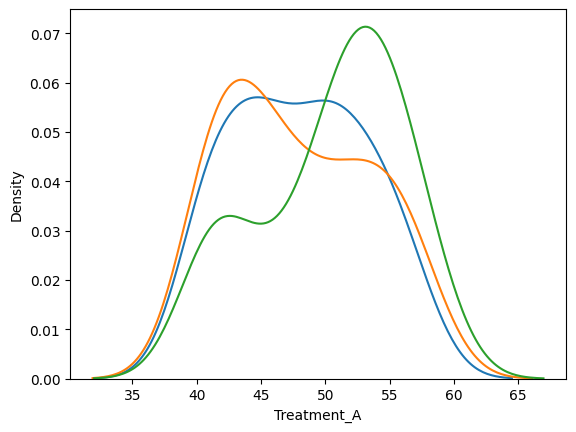

In [36]:
import seaborn as sns
sns.kdeplot(df['Treatment_A'])
sns.kdeplot(df['Treatment_B'])
sns.kdeplot(df['Treatment_C'])



![anova](https://www.leansixsigmadefinition.com/wp-content/uploads/2019/03/anova_charts-e1578120944898.jpg)

## Mann-Whitney U Test

- There's a weakness with using z-test and t-test if the data is not normally distributed (light skewness is ok)
- In a scenario where the distribution is inconsistent and far from a bell curve, we can use a **non-parametric** statistical evaluation. (hence, Mann-Whitney U test)
- Non-parametric evaluation means:
    - You cannot rely on statistical measure to interpret the data, such as mean, median, and standard deviation.
    - The distribution doesn't follow a normal distribution or resemble a bell curve

- The statistic value is called u-test
- Steps: same as t-test/z-test
    - $H_0$ there's no difference between Group A and B
    - $H_a$ there's a difference between Group A and B

**Example**</br>
Evaluate  the salaries of post-graduate students from 2 different universities and check if they are different from each other (based on 5% critical value).


In [38]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Mann-Whitney_U_Salaries.csv')
df.head()

,UnivOfDallas,ArizonaStateUniv
0,71555,73589
1,67887,83621
2,84334,74681
3,70133,83873
4,89304,72350


Let's inspect the distribution

array([[<Axes: title={'center': 'UnivOfDallas'}>,
        <Axes: title={'center': 'ArizonaStateUniv'}>]], dtype=object)

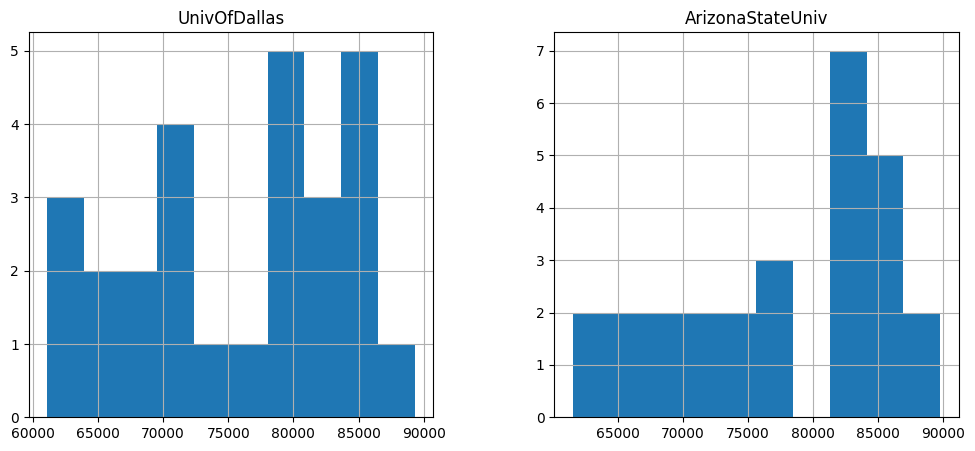

In [40]:
df.hist(figsize=(12,5))

Since the distribution is not normal/Gaussian, we cannot rely on parametric tests (z-test and t-test). Therefore, we need to use Mann-Whitney U test.

In [41]:
u_stat, p_val = sts.mannwhitneyu(df['UnivOfDallas'], df['ArizonaStateUniv'])

In [42]:
HypoTesting(p_val, alpha)

We do not reject (or accept) the null hypothesis.


**Outcome** We accept the null hypothesis. Therefore, there's no significant difference between the 2 salary data of the universities

> Mann-Whitney u-test only works for 2 variables. To apply on more than 2 variables, you can use the Kruskal-Wallis test.  

![fh](https://leanmanufacturing.online/wp-content/uploads/2020/10/Hypothesis-test-decision-tree-1024x612.png)